In [33]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir('/content/drive/MyDrive/自主練習/Netflix Data Analysis')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('./Netflix_Cleaned_Dataset.csv')

df #　8807 rows × 12 columns

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,genre,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,Unspecified,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,Unspecified,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,Unspecified,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8803,Movie,Zodiac,David Fincher,Mark Ruffalo,United States,"November 20, 2019",2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a..."
8803,8804,TV Show,Zombie Dumb,Unspecified,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
8804,8805,Movie,Zombieland,Ruben Fleischer,Jesse Eisenberg,United States,"November 1, 2019",2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,Tim Allen,United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."


# Netflix 擁有的娛樂節目數量

In [36]:
for col in df.columns:
  print(f'{col}: {len(df[col].unique())}')

show_id: 8807
type: 2
title: 8807
director: 4406
main_actor: 5401
country: 748
date_added: 1767
release_year: 74
rating: 15
duration: 220
genre: 36
description: 8775


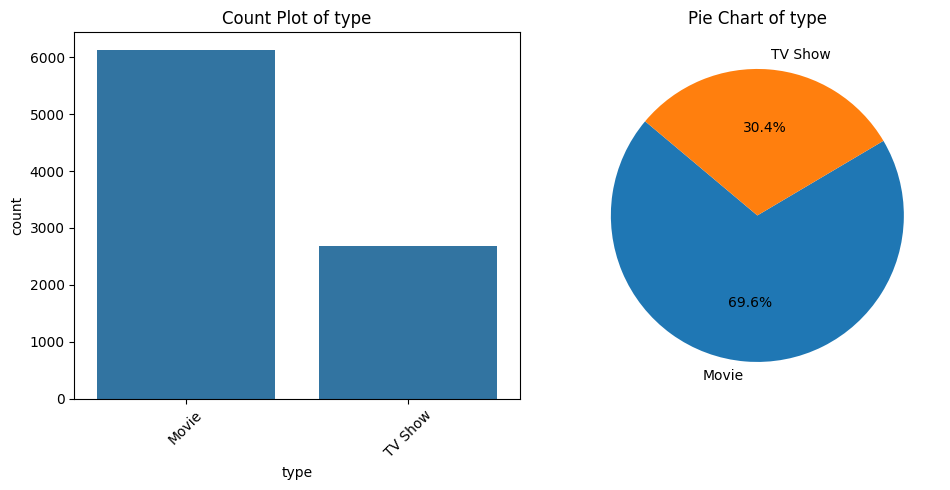

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [37]:
use_columns = ['type']
for col in use_columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    profile_counts = df[col].value_counts()
    plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {col}')
    plt.tight_layout()
    plt.show()
    print(df[col].value_counts())

在這裡我們可以看到，Netflix 提供的大部分內容都是電影（6131 部），而電視節目只有 2676 部。

Netflix 上大約 70% 的影片屬於電影類別，而只有大約 30% 屬於電視節目類別。

# Netflix 上最常見的類型是什麼？

<ipython-input-38-2b2cc90d2a01>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_genres.index, y=top_5_genres.values, palette='viridis')


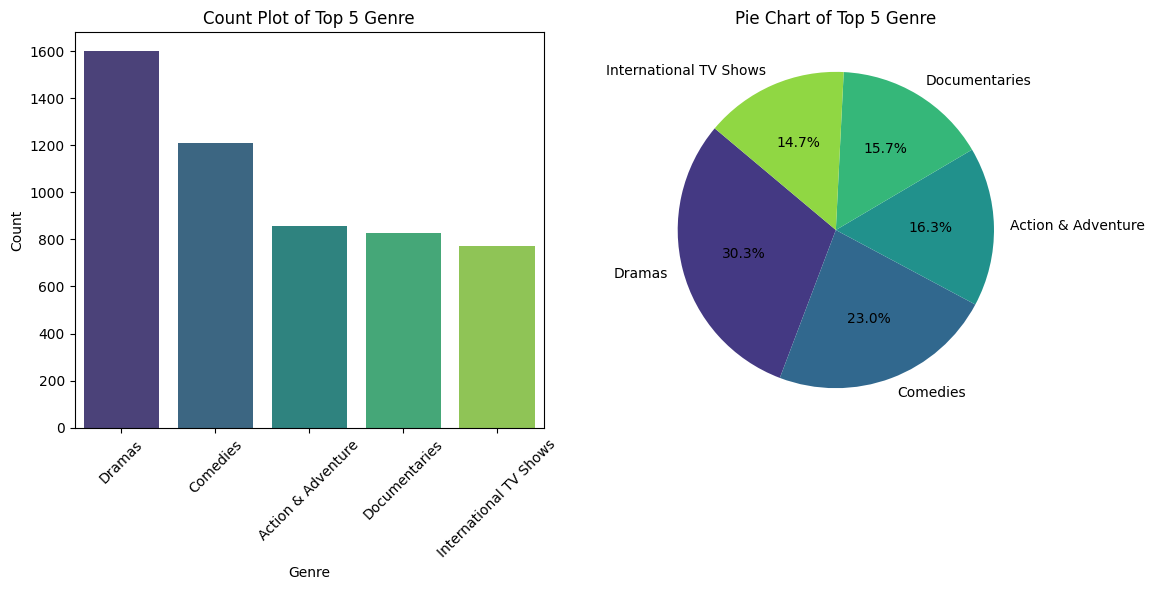

Top 5 Genre Counts:
 genre
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: count, dtype: int64


In [38]:
use_columns = ['genre']

for col in use_columns:
    # 前5名最受歡迎的影片類型
    top_5_genres = df[col].value_counts().nlargest(5)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x=top_5_genres.index, y=top_5_genres.values, palette='viridis')
    plt.title(f'Count Plot of Top 5 {col.capitalize()}')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_5_genres)))
    plt.title(f'Pie Chart of Top 5 {col.capitalize()}')
    plt.tight_layout()
    plt.show()
    print(f"Top 5 {col.capitalize()} Counts:\n", top_5_genres)

劇情片和喜劇佔據前兩名，而其餘三名的類型則由動作與冒險片、紀錄片和國際電視節目等類型佔據。

# 哪個國家的電影和電視劇產量最高？

<ipython-input-39-8aebeb14b6fe>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_genres.index, y=top_5_genres.values, palette='viridis')


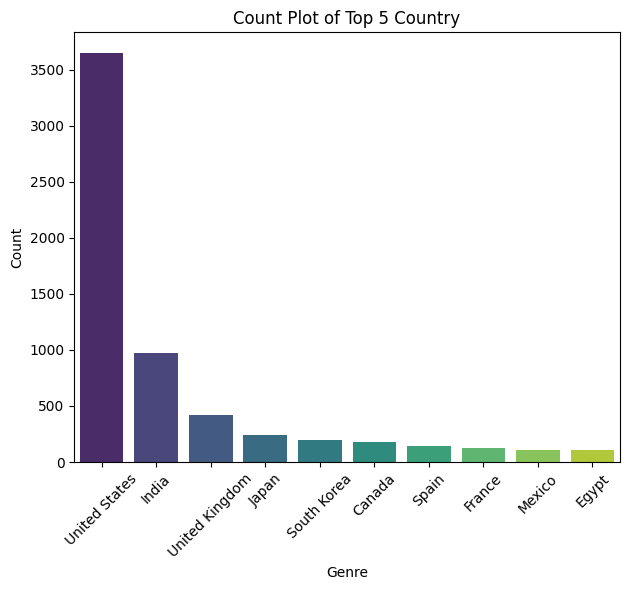

Top 5 Country Counts:
 country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [39]:
use_columns = ['country']

for col in use_columns:
    # 前10個最常出現的國家
    top_5_genres = df[col].value_counts().nlargest(10)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x=top_5_genres.index, y=top_5_genres.values, palette='viridis')
    plt.title(f'Count Plot of Top 5 {col.capitalize()}')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # plt.subplot(1, 2, 2)
    # plt.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_5_genres)))
    # plt.title(f'Pie Chart of Top 5 {col.capitalize()}')
    plt.tight_layout()
    plt.show()
    print(f"Top 5 {col.capitalize()} Counts:\n", top_5_genres)

美國一直是電影和電視節目的主要製作國，其次是印度和英國。

# 電影、電視節目的內容時長

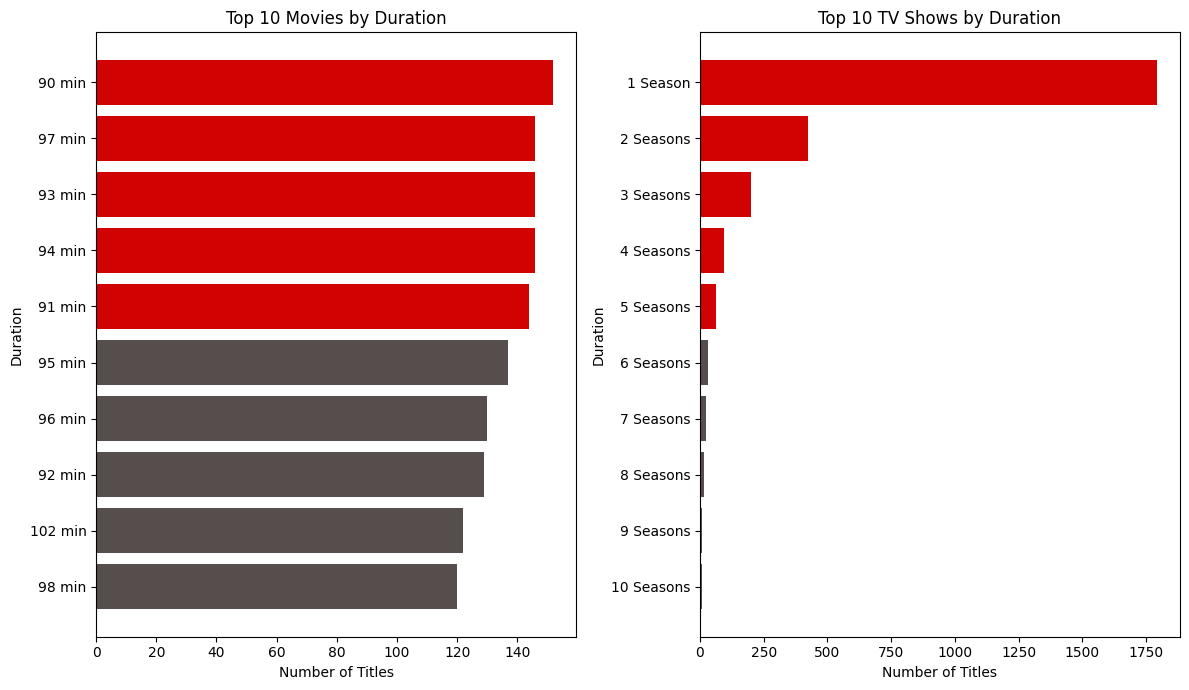

In [40]:
use_columns = ['type', 'duration']

# 計算每種 type-duration 的影片數量
df_titles_by_duration = pd.DataFrame(df.groupby(['type', 'duration'])['show_id'].count()).reset_index()
df_titles_by_duration.columns = ['type', 'duration', 'number of titles']

# 電影與電視節目的前 10 名
movies_data = df_titles_by_duration[df_titles_by_duration['type'] == 'Movie']
movies_data_sorted = movies_data.sort_values(by='number of titles', ascending=False).head(10)
top_10_movies_desc = movies_data_sorted.sort_values(by='number of titles', ascending=True)

tv_shows_data = df_titles_by_duration[df_titles_by_duration['type'] == 'TV Show']
tv_show_data_sorted = tv_shows_data.sort_values(by='number of titles', ascending=False).head(10)
top_10_tv_show_desc = tv_show_data_sorted.sort_values(by='number of titles', ascending=True)

colors_movies = top_10_movies_desc['number of titles'].apply(lambda y: '#564d4d' if y < 140 else '#D00202')
colors_tv_shows = top_10_tv_show_desc['number of titles'].apply(lambda y: '#564d4d' if y < 50 else '#D00202')

plt.figure(figsize=(12, 7))

# 前 10 部電影
plt.subplot(1, 2, 1)
plt.barh(top_10_movies_desc['duration'], top_10_movies_desc['number of titles'], color=colors_movies)
plt.title("Top 10 Movies by Duration")
plt.xlabel('Number of Titles')
plt.ylabel('Duration')

# 前 10 部電視節目
plt.subplot(1, 2, 2)
plt.barh(top_10_tv_show_desc['duration'], top_10_tv_show_desc['number of titles'], color=colors_tv_shows)
plt.title("Top 10 TV Shows by Duration")
plt.xlabel('Number of Titles')
plt.ylabel('Duration')

plt.tight_layout()
plt.show()

我們觀察到，大多數電影的最低觀看時間為 90 分鐘，而只有少數電視劇的長度超過單季。

# 前 5 名導演以其製作作品數量排名

<ipython-input-41-5538270e3d43>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_directors.index, y=top_5_directors.values, palette='viridis')


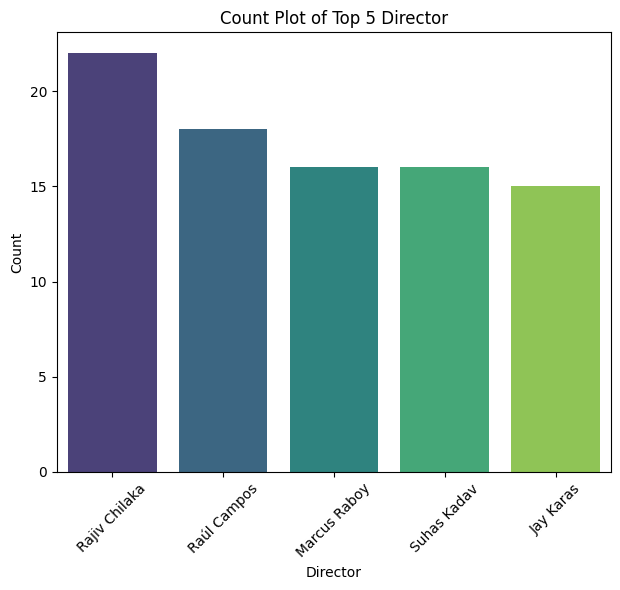

Top 5 Director Counts:
 director
Rajiv Chilaka    22
Raúl Campos      18
Marcus Raboy     16
Suhas Kadav      16
Jay Karas        15
Name: count, dtype: int64


In [41]:
df_test = df.copy()
df_test = df_test[df_test['director'] != 'Unspecified']
use_columns = ['director']

for col in use_columns:
    # 前5個最常出現的導演
    top_5_directors = df_test[col].value_counts().nlargest(5)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=top_5_directors.index, y=top_5_directors.values, palette='viridis')
    plt.title(f'Count Plot of Top 5 {col.capitalize()}')
    plt.xlabel('Director')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # plt.subplot(1, 2, 2)
    # plt.pie(top_5_directors, labels=top_5_directors.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_5_directors)))
    # plt.title(f'Pie Chart of Top 5 {col.capitalize()}')
    plt.tight_layout()
    plt.show()
    print(f"Top 5 {col.capitalize()} Counts:\n", top_5_directors)

Rajiv Chilaka製作了大約22個作品，而其他人的作品都不超過20個。

# Netflix 的發展

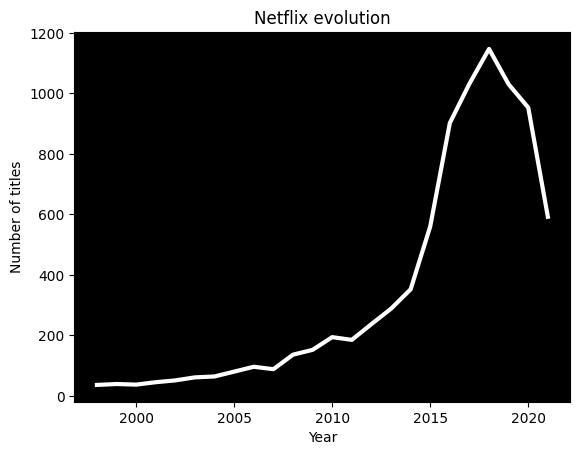

              The year with the maximum number of titles is: 2018               


In [42]:
df_titles_per_year = df.groupby('release_year')['show_id'].count().reset_index()
df_titles_per_year.columns = ['Year','Number of titles']

df_titles_after_1997 = df_titles_per_year[(df_titles_per_year['Year'] > 1997)]
max_year_index = df_titles_per_year['Number of titles'].idxmax()
max_year = df_titles_per_year['Year'].iloc[max_year_index]

plt.plot(df_titles_after_1997['Year'] ,df_titles_after_1997['Number of titles'], color='white',linewidth=3)

plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.title('Netflix evolution')
plt.gca().set_facecolor('black')
plt.show()

message = '\033[1m{:^80}'.format('The year with the maximum number of titles is: {}'.format(max_year))

print(message)

到 2018 年左右，Netflix 的劇集數量超過了 1000 部。

https://medium.com/womenintechnology/netflix-data-analysis-part-2-eda-with-pandas-and-matplotlib-e1e205baa33c